# House Price Prediction: Advanced Regression Techniques- Exploratory Data Analysis

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy import stats

<IPython.core.display.Javascript object>

Now the data has been cleaned and preprocessed including handling missing values, outliers, and perform necessary feature engineering (e.g., encoding categorical variables, scaling numeric features). We can now dive into our exploratory data analysis to better understand our data and the relationships between different features.

# Load the Data

In [3]:
df = pd.read_csv("new_training_set.csv")
df.head()

df_test = pd.read_csv("new_test_set.csv")

<IPython.core.display.Javascript object>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 202 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(24), int64(178)
memory usage: 2.3 MB


<IPython.core.display.Javascript object>

# Explore the Data

Now we will take a closer look at our feature variable and understand it a little more

In [5]:
df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<IPython.core.display.Javascript object>

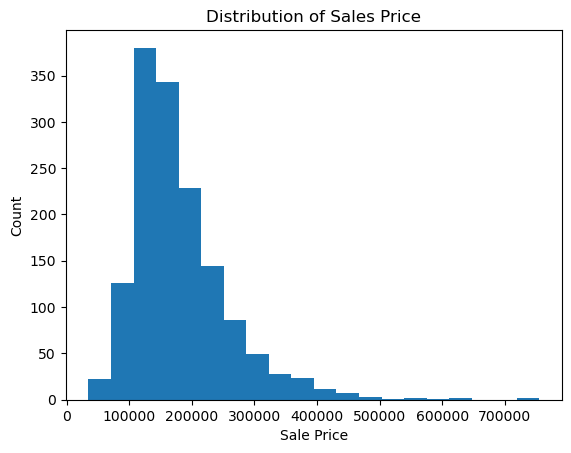

<IPython.core.display.Javascript object>

In [6]:
plt.hist(df["SalePrice"], bins=20)
plt.xlabel("Sale Price")
plt.ylabel("Count")
plt.title("Distribution of Sales Price")
plt.show()

This shows our data is right-skewed with most of the values being towards the left side of the distribution and the more extreme values being to the right of our distribution. This fits the data above from the describe() method which places the mean at about 180k and the Standard Deviation of 79442. Mean above the median makes sense as well with the extreme values having a larger impact on mean while the median being unaffected.

In [7]:
df["GrLivArea"].describe()

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

<IPython.core.display.Javascript object>

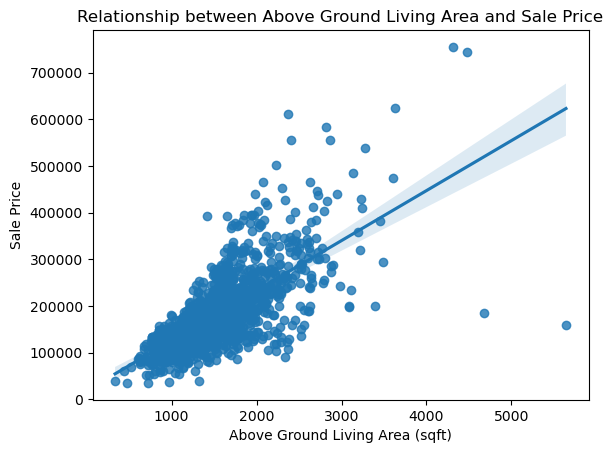

<IPython.core.display.Javascript object>

In [8]:
# Create a scatterplot with regression line

sns.regplot(x='GrLivArea', y='SalePrice', data=df)
plt.xlabel('Above Ground Living Area (sqft)')
plt.ylabel('Sale Price')
plt.title('Relationship between Above Ground Living Area and Sale Price')
plt.show()


In [9]:
# With a seemingly high correlation between the two, we check the r value

correlation = df["GrLivArea"].corr(df["SalePrice"])
correlation

0.7086244776126522

<IPython.core.display.Javascript object>

As expected there is a moderately high correlation between square feet of living area and sales price with a correlation coefficient of .71. While a high correlation coefficient does not necessarily also mean causation, we will hypothesize that in this case they do go together as a larger house tends to mean a higher sales price.

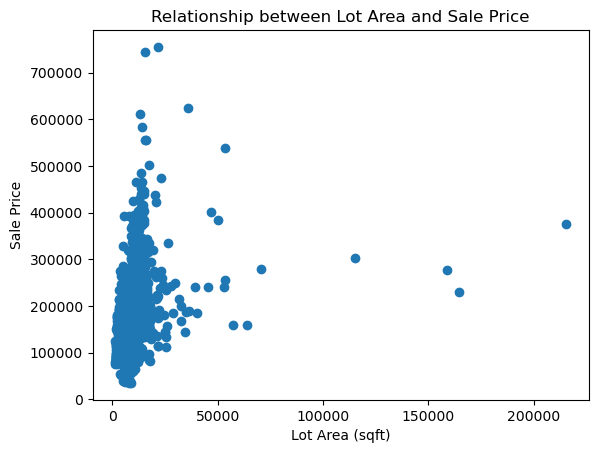

<IPython.core.display.Javascript object>

In [10]:
# Create a scatterplot to show the relationship between lot area in square feet and Sale Price

plt.scatter(x="LotArea", y="SalePrice", data=df)
plt.xlabel("Lot Area (sqft)")
plt.ylabel("Sale Price")
plt.title("Relationship between Lot Area and Sale Price")
plt.show()

Because living area was so highly correlated to sale price it was worth observing the relationship between lot area and sale price. The scatterplot above shows that there is virtually no obvious relationship between lot area and sale price.

In [11]:
correlation = df["OverallQual"].corr(df["OverallCond"])
correlation

-0.0919323426390718

<IPython.core.display.Javascript object>

In [12]:
df[["OverallQual", "OverallCond"]].describe()

,OverallQual,OverallCond
count,1460.000000,1460.000000
mean,6.099315,5.575342
std,1.382997,1.112799
min,1.000000,1.000000
25%,5.000000,5.000000
50%,6.000000,5.000000
75%,7.000000,6.000000
max,10.000000,9.000000


<IPython.core.display.Javascript object>

We one-hot encoded all of the non-ordinal features using dummy variables into quantitative features. We can group the data
and see the mean sales price for each option

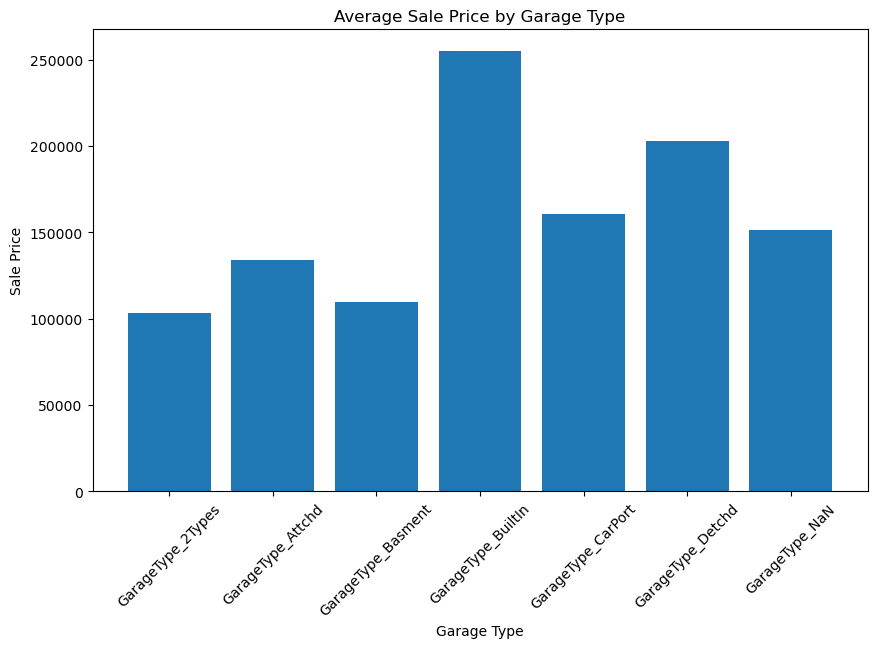

<IPython.core.display.Javascript object>

In [13]:
# Select relevant columns
garage_types = [
    "GarageType_2Types",
    "GarageType_Attchd",
    "GarageType_Basment",
    "GarageType_BuiltIn",
    "GarageType_CarPort",
    "GarageType_Detchd",
    "GarageType_NaN",
]
selected_columns = garage_types + ["SalePrice"]
data_subset = df[selected_columns]

# Group by garage type and calculate average sale price
grouped_data = data_subset.groupby(garage_types).mean()

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(garage_types, grouped_data["SalePrice"])
plt.xlabel("Garage Type")
plt.ylabel("Sale Price")
plt.title("Average Sale Price by Garage Type")
plt.xticks(rotation=45)
plt.show()

Houses with no garage are right in the middle in terms of rankings of sale price. This suggests that the presence or absence of a garage may not have a significant impact on Sale Price.

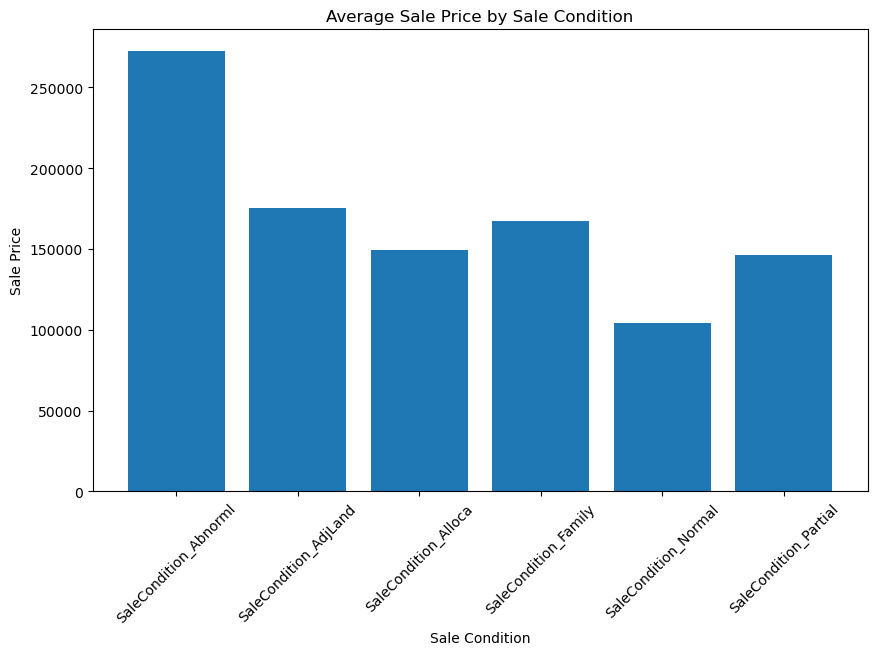

<IPython.core.display.Javascript object>

In [14]:
# Select relevant columns
sale_condition = [
    "SaleCondition_Abnorml",
    "SaleCondition_AdjLand",
    "SaleCondition_Alloca",
    "SaleCondition_Family",
    "SaleCondition_Normal",
    "SaleCondition_Partial",
]
selected_columns = sale_condition + ["SalePrice"]
data_subset = df[selected_columns]

# Group by sale condition and calculate average sale price
grouped_data = data_subset.groupby(sale_condition).mean()

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(sale_condition, grouped_data["SalePrice"])
plt.xlabel("Sale Condition")
plt.ylabel("Sale Price")
plt.title("Average Sale Price by Sale Condition")
plt.xticks(rotation=45)
plt.show()

This chart comparing the different sale conditions is a little surprising as normal sales tend to be the lowest and Partial sales(associated with new homes) tend to be the second lowest. Abnormal sales which include, trades, short sales, and foreclosures have the highest average sales price at over 250k.

This does seem counterintuitive at first, however foreclosures and short sales often occur when homeowners face financial difficulties and are unable to keep up with their mortgage obligations. Higher-priced houses may have buyers who stretch their budgets and are more susceptible to financial instability. On the other hand, buyers of lower-priced houses may be more conservative in their purchasing decisions and therefore have a lower likelihood of experiencing financial hardships leading to foreclosure or short sale situations.

In [15]:
selected_columns = df.columns[:51]  # Select the first 10 columns
print(selected_columns)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LandSlope', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


<IPython.core.display.Javascript object>

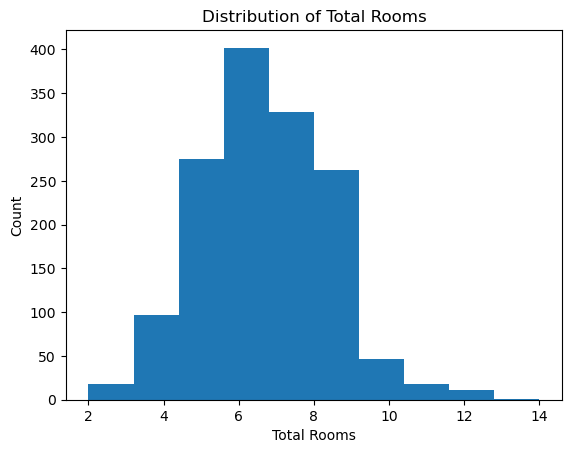

<IPython.core.display.Javascript object>

In [16]:
plt.hist(df["TotRmsAbvGrd"], bins=10)
plt.xlabel("Total Rooms")
plt.ylabel("Count")
plt.title("Distribution of Total Rooms")
plt.show()

In [17]:
correlation = df["TotRmsAbvGrd"].corr(df["SalePrice"])
correlation

0.5337231555820284

<IPython.core.display.Javascript object>

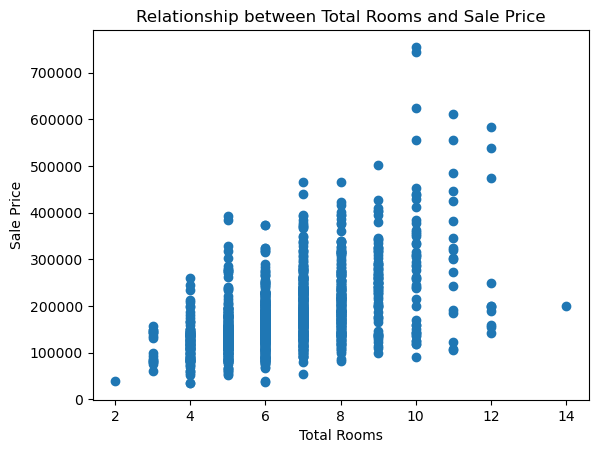

<IPython.core.display.Javascript object>

In [18]:
# Create a scatterplot to show the relationship between Living area in square feet and Sale Price

plt.scatter(x="TotRmsAbvGrd", y="SalePrice", data=df)
plt.xlabel("Total Rooms")
plt.ylabel("Sale Price")
plt.title("Relationship between Total Rooms and Sale Price")
plt.show()

The relationship between total rooms and Sale Price is a positive one although not particularly strong. On the other hand living space in square feet is a very strong relationship. Bigger houses tend to have more rooms so this gap in correlation shows us that it is likely more important to look at things like the layout/amenities of a house rather than just the room count.

# Inferential Statistics: One-Sample T-Test

Null Hypothesis (H0): The population mean sale price is equal to the sample mean sale price (μ = x̄),
where μ represents the population mean sale price and x̄ is the sample mean sale price.

Alternative Hypothesis (HA): The population mean sale price is significantly different from the sample mean sale price (μ ≠ x̄).

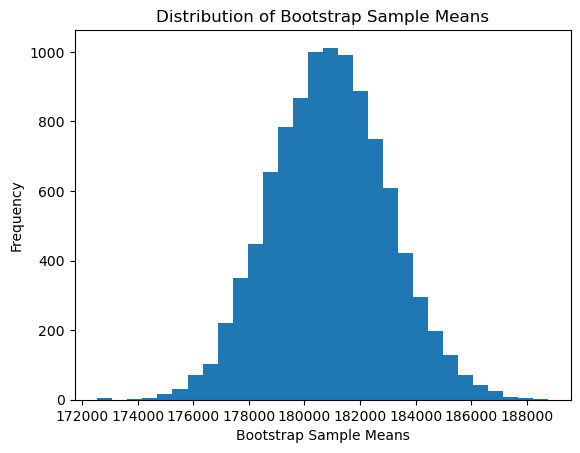

Bootstrap Confidence Interval (95%): [176958.25856164 185055.33950342]
Mean of Bootstrap Sample Means: 180903.06448746577
Standard Deviation of Bootstrap Sample Means: 2095.8197189449547


<IPython.core.display.Javascript object>

In [19]:
# Set the number of bootstrap iterations
n_iterations = 10000

# Create an array to store the bootstrap sample means
bootstrap_means = []

# Perform bootstrapping
for _ in range(n_iterations):
    # Randomly select indices from the sample data with replacement
    bootstrap_sample = np.random.choice(
        df["SalePrice"], size=len(df["SalePrice"]), replace=True
    )

    # Calculate the mean of the bootstrap sample
    bootstrap_mean = np.mean(bootstrap_sample)

    # Append the bootstrap mean to the array
    bootstrap_means.append(bootstrap_mean)

# Analyze the distribution of bootstrap means
# For example, create a histogram
plt.hist(bootstrap_means, bins=30)
plt.xlabel("Bootstrap Sample Means")
plt.ylabel("Frequency")
plt.title("Distribution of Bootstrap Sample Means")
plt.show()

# Calculate the confidence interval
confidence_interval = np.percentile(bootstrap_means, q=[2.5, 97.5])
print("Bootstrap Confidence Interval (95%):", confidence_interval)

# Calculate summary statistics of the bootstrap means
mean_bootstrap_means = np.mean(bootstrap_means)
std_bootstrap_means = np.std(bootstrap_means)
print("Mean of Bootstrap Sample Means:", mean_bootstrap_means)
print("Standard Deviation of Bootstrap Sample Means:", std_bootstrap_means)

Based on the bootstrap sampling above we are 95% confident that the true mean of the population Sales Price lies between 176,822 and 185,034. The sample mean of our bootstrap sample is 180,891 which is almost identical to our sample mean of 180,921.

Furthermore, the standard deviation of the bootstrap sample means is 2078, indicating relatively low variability in the estimated means. This low variability indicates that the estimated means from the bootstrap samples are consistent and provide a stable estimate of the population mean.

In [20]:
# Set the correlation threshold
threshold = 0.3

# Create an empty list to store the names of features to drop
features_to_drop = []

# Loop through each feature in the DataFrame (excluding the target variable)
for feature in df.drop(columns=["SalePrice"]):
    correlation_score = df[feature].corr(
        df["SalePrice"]
    )  # Calculate the correlation with the target
    if abs(correlation_score) < threshold:
        features_to_drop.append(feature)

# Drop the features with low correlation from the DataFrame
df.drop(columns=features_to_drop, inplace=True)
df_test.drop(columns=features_to_drop, inplace=True)

<IPython.core.display.Javascript object>

In [21]:
df.shape

(1460, 42)

<IPython.core.display.Javascript object>

In [22]:
df_test.shape

(1459, 42)

<IPython.core.display.Javascript object>

In [23]:
# Save the modified training set (df) to a CSV file named "new_training_set.csv"
df.to_csv("new_training_set.csv", index=False)

# Save the modified test set (df_test) to a CSV file named "new_test_set.csv"
df_test.to_csv("new_test_set.csv", index=False)

<IPython.core.display.Javascript object>